In [15]:
import pandas as pd
import numpy as np
import sys
sys.path.append('../../src')
from ecomplexity import ecomplexity
import matplotlib.pyplot as plt

import matplotlib.ticker as ptick
import networkx as nx
import networkx.algorithms.bipartite as bip


# 小数点以下 桁数 6
pd.options.display.float_format = '{:.3f}'.format


In [16]:
import initial_condition
from analysis import weight
from analysis import rank as vr


In [17]:
global data_dir, output_dir
data_dir = '../../data/processed/internal/firms/'
output_dir = '../../output/'


In [18]:
# 初期条件
ar = initial_condition.AR
year_style = initial_condition.YEAR_STYLE

year_start = initial_condition.YEAR_START
year_end = initial_condition.YEAR_END
year_range = initial_condition.YEAR_RANGE

classification = initial_condition.CLASSIFICATION
class_weight = initial_condition.CLASS_WEIGHT
applicant_weight = initial_condition.APPLICANT_WEIGHT

extract_population = initial_condition.EXTRACT_POPULATION
top_p_or_num = initial_condition.TOP_P_OR_NUM


In [19]:
df = pd.read_csv(f'{data_dir}{ar}_{year_style}_{top_p_or_num[0]}_{top_p_or_num[1]}.csv')
df

,app_year_period,right_person_name,reg_num,schmoch35,diversity,kci,kh_1,kh_2,kh_3,kh_4,...,kh_11,kh_12,kh_13,kh_14,kh_15,kh_16,kh_17,kh_18,kh_19,kh_20
0,1981-1990,アルプスアルパイン株式会社,1026.167,25,5,-0.872,22.800,8.588,22.501,9.074,...,23.830,9.412,23.915,9.433,23.967,9.446,23.998,9.454,24.017,9.458
1,1981-1990,オムロン株式会社,2424.400,28,9,-1.308,19.444,8.950,21.494,8.934,...,23.728,9.385,23.855,9.417,23.932,9.437,23.977,9.448,24.004,9.455
2,1981-1990,オリンパス株式会社,4540.667,29,5,-0.512,23.800,8.519,23.582,9.139,...,23.913,9.433,23.964,9.446,23.996,9.453,24.015,9.458,24.027,9.461
3,1981-1990,カシオ計算機株式会社,2337.500,27,8,-1.471,17.375,8.710,20.920,8.858,...,23.693,9.377,23.835,9.412,23.919,9.434,23.970,9.446,24.000,9.454
4,1981-1990,キヤノン株式会社,20269.500,32,7,-1.093,20.429,8.246,22.270,8.934,...,23.787,9.402,23.889,9.427,23.951,9.442,23.988,9.451,24.011,9.457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358,2001-2010,鹿島建設株式会社,1107.561,27,8,0.842,26.000,9.839,24.915,9.709,...,24.424,9.656,24.407,9.653,24.398,9.652,24.394,9.651,24.391,9.650
359,2001-2010,ＤＩＣ株式会社,2044.436,29,8,1.057,27.500,10.305,25.280,10.040,...,24.450,9.673,24.420,9.661,24.405,9.655,24.397,9.652,24.393,9.651
360,2001-2010,ＪＦＥスチール株式会社,6608.283,30,8,0.739,25.000,10.056,25.088,9.790,...,24.423,9.657,24.406,9.654,24.398,9.652,24.393,9.651,24.391,9.650
361,2001-2010,ＴＤＫ株式会社,5004.817,33,9,-0.771,26.778,9.380,24.539,9.496,...,24.345,9.636,24.365,9.643,24.376,9.646,24.382,9.648,24.385,9.649


c:\Users\rin\Desktop\ObjectiveDirectory\notebooks\3_analysis\../../src\analysis\rank.py:315: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


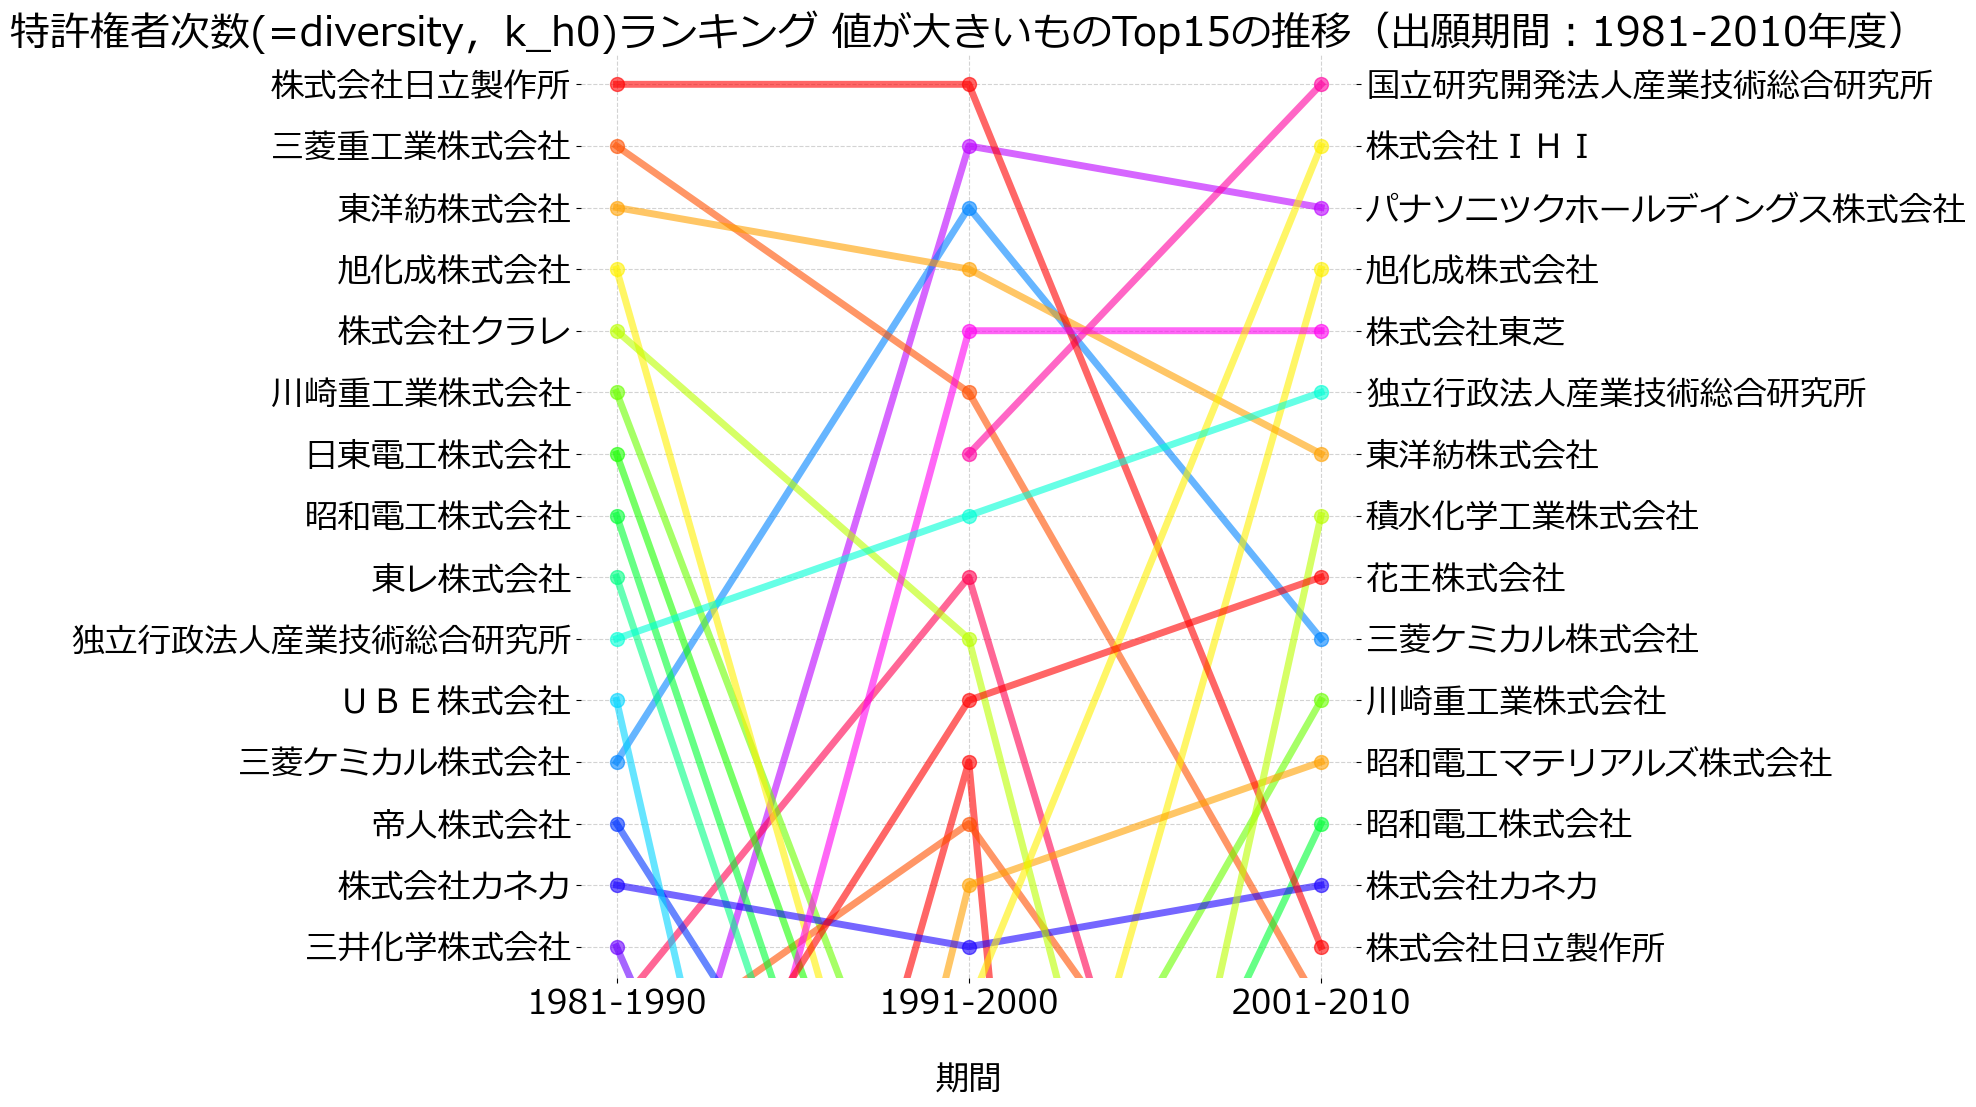

c:\Users\rin\Desktop\ObjectiveDirectory\notebooks\3_analysis\../../src\analysis\rank.py:315: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


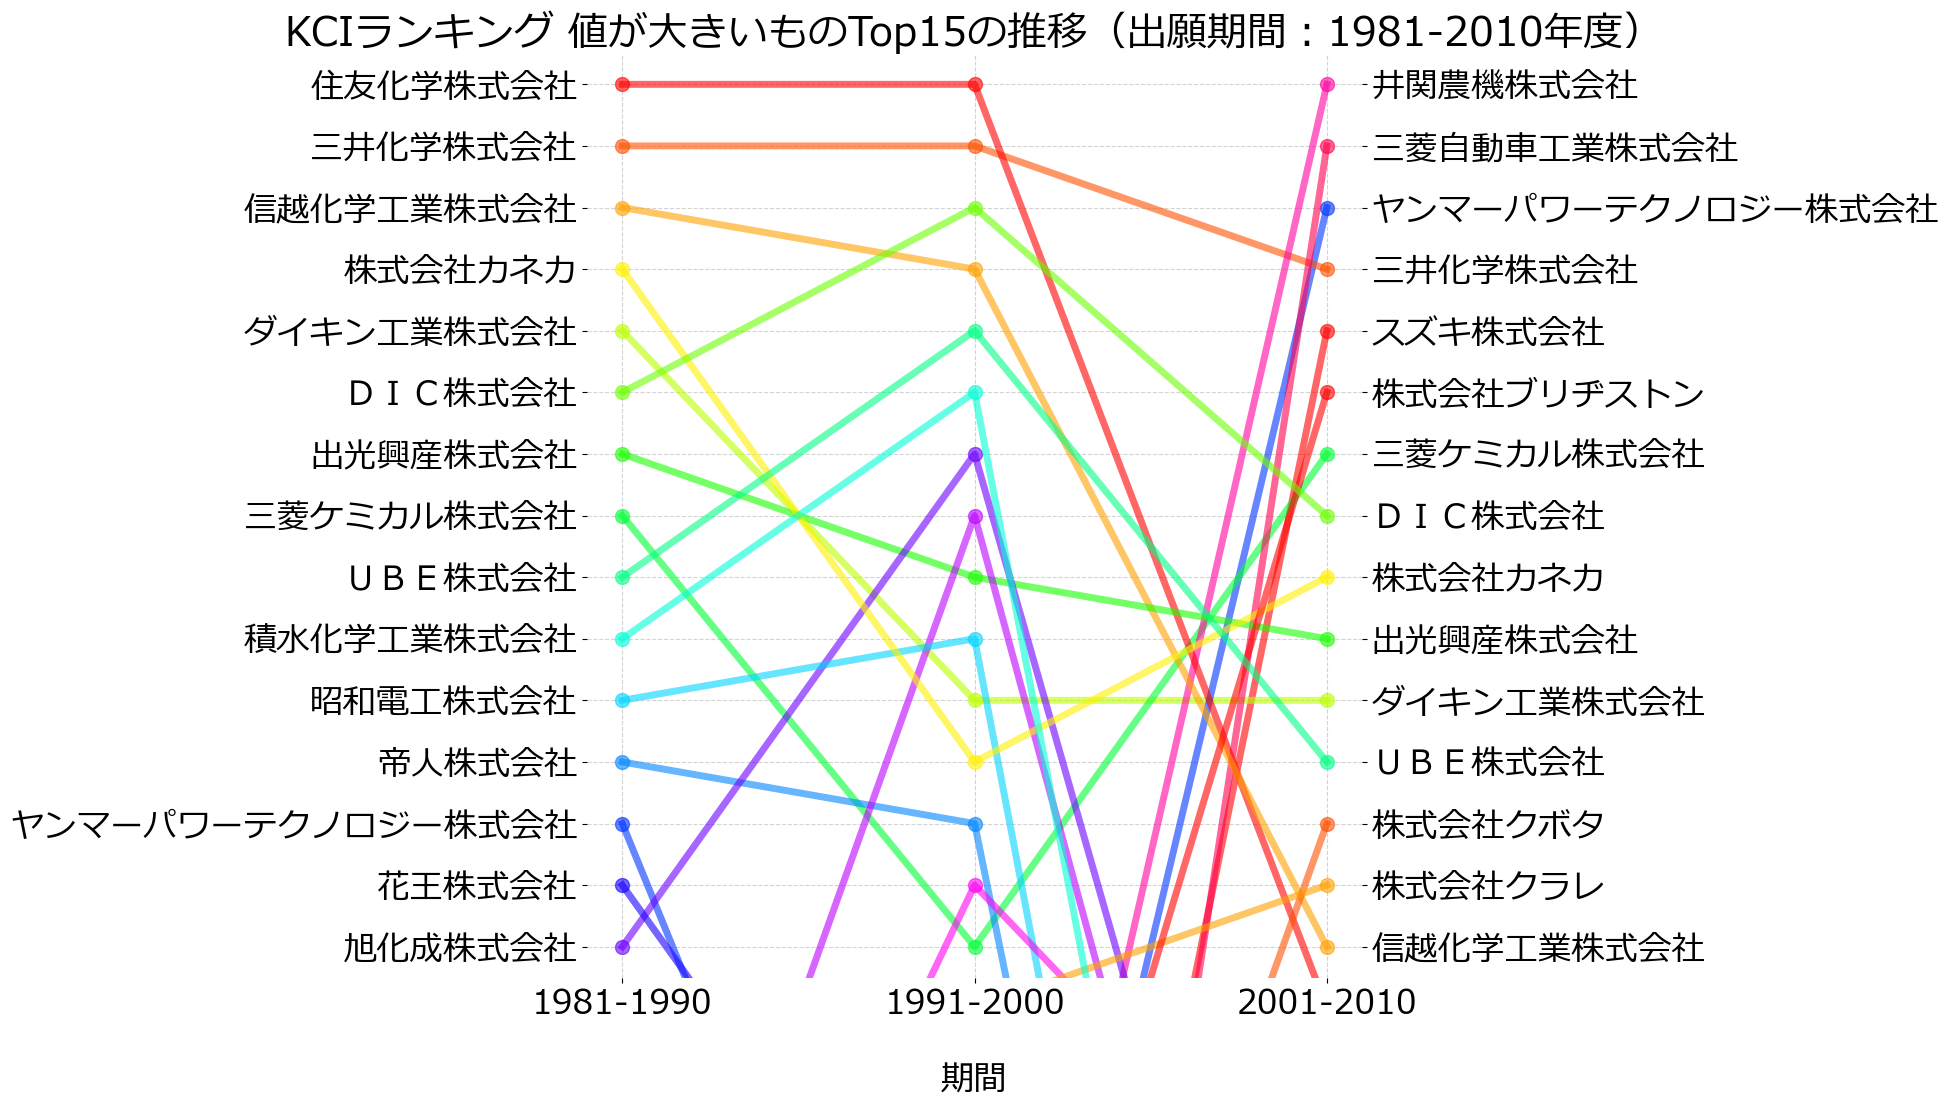

In [23]:
df_dict = {}
combi_dict = {# 1: ['right_person_name', 'diversity', f'特許権者次数(=diversity，k_h0)ランキング 値が小さいものTop15の推移（出願期間：{year_start}-{year_end}年度）', True], 
              # 1: ['right_person_name', '', f'特許権者次数(=diversity，k_h0)ランキング 値が小さいものTop15の推移（出願期間：{year_start}-{year_end}年度）', True], 
              2: ['right_person_name', 'diversity', f'特許権者次数(=diversity，k_h0)ランキング 値が大きいものTop15の推移（出願期間：{year_start}-{year_end}年度）', False], 
            #   3: ['right_person_name', 'eci', f'KCIランキング 値が小さいものTop15の推移（出願期間：{year_start}-{year_end}年度）', True], 
              # 3: ['right_person_name', 'ipc_class_num', f'IPC数ランキング 値が大きいものTop15の推移（出願期間：{year_start}-{year_end}年度）', False], 
              4: ['right_person_name', 'kci', f'KCIランキング 値が大きいものTop15の推移（出願期間：{year_start}-{year_end}年度）', False], 
              # 5: ['ipc_class', 'ubiquity', f'IPC次数(=ubiquity, k_i0)ランキング 低次数Top15の推移（出願期間：{year_start}-{year_end}年度）', True], 
              # 6: ['ipc_class', 'ubiquity', f'IPC次数(=ubiquity, k_i0)ランキング 高次数Top15の推移（出願期間：{year_start}-{year_end}年度）', False], 
            #   7: ['ipc_class', 'pci', f'TCI(Technological Compexity Index)ランキング 値が低いものTop15の推移（出願期間：{year_start}-{year_end}年度）', True], 
              # 8: [classification, 'tci', f'TCI(Technological Compexity Index)ランキング 値が高いものTop15の推移（出願期間：{year_start}-{year_end}年度）', False]
              }



for i, combi in combi_dict.items():
    div_df = df[[f'{ar}_{year_style}_period']+combi[:1+1]].sort_values(by=[f'{ar}_{year_style}_period', combi[1]], ascending=[True, False]).copy()
    div_df = div_df.drop_duplicates(keep='first')
    div_df_dict = {}
    for year in range(year_start, year_end+1, year_range):
        period = f'{year}-{year+year_range-1}'
        div_df_dict[period] = div_df[div_df[f'{ar}_{year_style}_period']==period].copy()
        # display(div_df_dict[f'{year}-{year+year_range-1}'].head(15))
    if i==4:
        df['kci_rank'] = df.groupby(f'{ar}_{year_style}_period')[['kci']].rank(ascending=False, method='first').reset_index(drop=False)['kci']
        # display(c_df[c_df['right_person_name'].str.contains('三菱重工業')])
    if i > 4: fs = (12, 15)
    else: fs = (10, 12)
    # display(div_df)
    sample = vr.rank_doubleaxis(div_df_dict, 
                version='kci', 
                    rank_num=15,
                    member_col=combi[0], 
                    num_col=combi[1],
                    prop_dict={
                        'figsize': fs,
                        'xlabel': '期間',
                        'ylabel': '',
                        'title': combi[2],
                        'fontsize': 24, 
                        'year_range': year_range, 
                        'ascending': combi[3], 
                        # 'color': color_dict
                        'color': 'default'
                    })
    # plt.savefig(f'../Fig/Rank/p{p}/{combi[2]}{year_range}年ごと.png')
    plt.show()
